In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

%matplotlib inline

In [3]:
from google.cloud import bigquery

# Create client object
client = bigquery.Client()

# Create dataset reference
dataset_ref = client.dataset('google_analytics_sample', project='bigquery-public-data')

# Retrieve dataset from reference
dataset = client.get_dataset(dataset_ref)

Using Kaggle's public dataset BigQuery integration.


In [4]:
# Create table reference
table_ref_20160801 = dataset_ref.table('ga_sessions_20160801')

# Retrieve table from reference
table_20160801 = client.get_table(table_ref_20160801)

# View columns
client.list_rows(table_20160801, max_results=5).to_dataframe()

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,channelGrouping,socialEngagementType
0,NaN,1,1470046245,1470046245,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",895954260133011192,None,Organic Search,Not Socially Engaged
1,NaN,1,1470084717,1470084717,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 18, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Internet Explorer', 'browserVersi...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 13, 'minu...",0288478011259077136,None,Direct,Not Socially Engaged
2,NaN,3,1470078988,1470078988,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",6440789996634275026,None,Organic Search,Not Socially Engaged
3,NaN,4,1470075581,1470075581,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 19, 'ti...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 11, 'minu...",8520115029387302083,None,Referral,Not Socially Engaged
4,NaN,30,1470099026,1470099026,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 17, 'minu...",6792260745822342947,None,Organic Search,Not Socially Engaged


In [5]:
def format_schema_field(schema_field, indent=0):
    indent_str = "  " * indent
    field_info = f"{indent_str}{schema_field.name} ({schema_field.field_type})"
    
    if schema_field.mode != "NULLABLE":
        field_info += f" - {schema_field.mode}"
    
    if schema_field.description:
        field_info += f" - {schema_field.description}"
    
    nested_indent = indent + 2
    if schema_field.field_type == "RECORD":
        for sub_field in schema_field.fields:
            field_info += "\n" + format_schema_field(sub_field, nested_indent)
    
    return field_info

# Display schemas
print("SCHEMA field for the 'totals' column:\n")
print(format_schema_field(table_20160801.schema[5]))
print()

print("\nSCHEMA field for the 'trafficSource' column:\n")
print(format_schema_field(table_20160801.schema[6]))
print()

print("\nSCHEMA field for the 'device' column:\n")
print(format_schema_field(table_20160801.schema[7]))
print()

print("\nSCHEMA field for the 'geoNetwork' column:\n")
print(format_schema_field(table_20160801.schema[8]))
print()

print("\nSCHEMA field for the 'customDimensions' column:\n")
print(format_schema_field(table_20160801.schema[9]))
print()

print("\nSCHEMA field for the 'hits' column:\n")
print(format_schema_field(table_20160801.schema[10]))

SCHEMA field for the 'totals' column:

totals (RECORD)
    visits (INTEGER)
    hits (INTEGER)
    pageviews (INTEGER)
    timeOnSite (INTEGER)
    bounces (INTEGER)
    transactions (INTEGER)
    transactionRevenue (INTEGER)
    newVisits (INTEGER)
    screenviews (INTEGER)
    uniqueScreenviews (INTEGER)
    timeOnScreen (INTEGER)
    totalTransactionRevenue (INTEGER)
    sessionQualityDim (INTEGER)


SCHEMA field for the 'trafficSource' column:

trafficSource (RECORD)
    referralPath (STRING)
    campaign (STRING)
    source (STRING)
    medium (STRING)
    keyword (STRING)
    adContent (STRING)
    adwordsClickInfo (RECORD)
        campaignId (INTEGER)
        adGroupId (INTEGER)
        creativeId (INTEGER)
        criteriaId (INTEGER)
        page (INTEGER)
        slot (STRING)
        criteriaParameters (STRING)
        gclId (STRING)
        customerId (INTEGER)
        adNetworkType (STRING)
        targetingCriteria (RECORD)
            boomUserlistId (INTEGER)
        isV

In [6]:
# Define the query
query = """
SELECT 
    CAST(fullVisitorId AS STRING) AS fullVisitorId,
    visitNumber,
    visitId,
    TIMESTAMP_SECONDS(visitStartTime) AS session_start_time,
    TIMESTAMP_SECONDS(visitStartTime + totals.timeOnSite) AS session_end_time,
    PARSE_DATE('%Y%m%d', date) AS session_date,
    hits.page.pagePath AS page_path,
    hits.eventInfo.eventCategory AS event_category,
    hits.eventInfo.eventAction AS event_action,
    hits.eventInfo.eventLabel AS event_label,
    product.productSKU AS product_sku,
    product.v2ProductName AS product_name,
    product.productPrice AS product_price,
    hits.eCommerceAction.action_type AS action_type,
    totals.transactions AS total_transactions,
    totals.totalTransactionRevenue AS total_transaction_revenue,
    trafficSource.source AS traffic_source,
    trafficSource.medium AS traffic_medium,
    trafficSource.campaign AS traffic_campaign,
    device.deviceCategory AS device_category,
    geoNetwork.country AS user_country,
    hits.type AS hits_type
FROM 
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
    UNNEST(hits) AS hits,
    UNNEST(hits.product) AS product
WHERE 
    _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
    AND hits.eCommerceAction.action_type IS NOT NULL
    AND hits.eCommerceAction.action_type !='0'
"""


In [7]:
df = client.query(query).result().to_dataframe()
df.head(10)

,fullVisitorId,visitNumber,visitId,session_start_time,session_end_time,session_date,page_path,event_category,event_action,event_label,...,product_price,action_type,total_transactions,total_transaction_revenue,traffic_source,traffic_medium,traffic_campaign,device_category,user_country,hits_type
0,8749601285271951332,3,1493937993,2017-05-04 22:46:33+00:00,2017-05-04 22:47:04+00:00,2017-05-04,/google+redesign/office,Enhanced Ecommerce,Quickview Click,Google Doodle Decal,...,2990000,1,NaN,NaN,dfa,cpm,(not set),desktop,United States,EVENT
1,4226145940126415872,1,1493897249,2017-05-04 11:27:29+00:00,2017-05-04 11:34:19+00:00,2017-05-04,/google+redesign/apparel/quickview,None,None,None,...,16990000,2,NaN,NaN,google,organic,(not set),desktop,United States,PAGE
2,8181662580465198143,1,1493886388,2017-05-04 08:26:28+00:00,2017-05-04 08:26:54+00:00,2017-05-04,/google+redesign/drinkware,Enhanced Ecommerce,Quickview Click,20 oz Stainless Steel Insulated Tumbler,...,24990000,1,NaN,NaN,google,organic,(not set),desktop,India,EVENT
3,3259505303448720247,1,1493898426,2017-05-04 11:47:06+00:00,2017-05-04 11:47:14+00:00,2017-05-04,/google+redesign/shop+by+brand/youtube/quickview,None,None,None,...,7990000,2,NaN,NaN,google,organic,(not set),desktop,India,PAGE
4,5292266813697666289,1,1493948384,2017-05-05 01:39:44+00:00,2017-05-05 01:40:00+00:00,2017-05-04,/google+redesign/shop+by+brand/youtube/quickview,None,None,None,...,10990000,2,NaN,NaN,google,organic,(not set),mobile,India,PAGE
5,7644219996962532176,1,1493885326,2017-05-04 08:08:46+00:00,2017-05-04 08:08:53+00:00,2017-05-04,/google+redesign/shop+by+brand/youtube,Enhanced Ecommerce,Quickview Click,YouTube Custom Decals,...,1990000,1,NaN,NaN,google,organic,(not set),desktop,United States,EVENT
6,8364384378256707897,1,1493954216,2017-05-05 03:16:56+00:00,2017-05-05 03:17:09+00:00,2017-05-04,/google+redesign/accessories/stickers/home,Enhanced Ecommerce,Quickview Click,Keyboard DOT Sticker,...,1500000,1,NaN,NaN,google,organic,(not set),desktop,United States,EVENT
7,8364384378256707897,1,1493954216,2017-05-05 03:16:56+00:00,2017-05-05 03:17:09+00:00,2017-05-04,/google+redesign/accessories/stickers//quickview,None,None,None,...,1500000,2,NaN,NaN,google,organic,(not set),desktop,United States,PAGE
8,5612830800144537904,2,1493924749,2017-05-04 19:05:49+00:00,2017-05-04 19:06:24+00:00,2017-05-04,/google+redesign/apparel/mens+outerwear/blm+sw...,Enhanced Ecommerce,Add to Cart,None,...,41990000,3,NaN,NaN,google,organic,(not set),desktop,United States,EVENT
9,9550705733723196313,1,1493923772,2017-05-04 18:49:32+00:00,2017-05-04 18:58:26+00:00,2017-05-04,/google+redesign/apparel/mens+outerwear/blm+sw...,Enhanced Ecommerce,Add to Cart,None,...,41990000,3,NaN,NaN,(direct),(none),(not set),desktop,United States,EVENT


In [8]:
# Create the target variable
df['conversion'] = (df['total_transactions'] > 0).astype(int)

In [9]:
# Feature Engineering
numeric_features = ['visitNumber', 'total_transactions', 'total_transaction_revenue']
categorical_features = ['device_category', 'traffic_source', 'traffic_medium', 'user_country']

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [11]:
# Preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#preprocessing and modeling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])


In [12]:
print(df.columns)

Index(['fullVisitorId', 'visitNumber', 'visitId', 'session_start_time',
       'session_end_time', 'session_date', 'page_path', 'event_category',
       'event_action', 'event_label', 'product_sku', 'product_name',
       'product_price', 'action_type', 'total_transactions',
       'total_transaction_revenue', 'traffic_source', 'traffic_medium',
       'traffic_campaign', 'device_category', 'user_country', 'hits_type',
       'conversion'],
      dtype='object')


In [13]:
print(numeric_features)
print(categorical_features)

['visitNumber', 'total_transactions', 'total_transaction_revenue']
['device_category', 'traffic_source', 'traffic_medium', 'user_country']


In [14]:
#preparing features and target
X = df[numeric_features + categorical_features]
y = df['conversion']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['visitNumber',
                                                   'total_transactions',
                                                   'total_transaction_revenue']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['device_category',
                                                   'traffic_source',
                                                   'traffic_medium',
                                                   'user_country'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [17]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    177599
           1       1.00      1.00      1.00     76428

    accuracy                           1.00    254027
   macro avg       1.00      1.00      1.00    254027
weighted avg       1.00      1.00      1.00    254027


Confusion Matrix:
[[177596      3]
 [   195  76233]]


In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

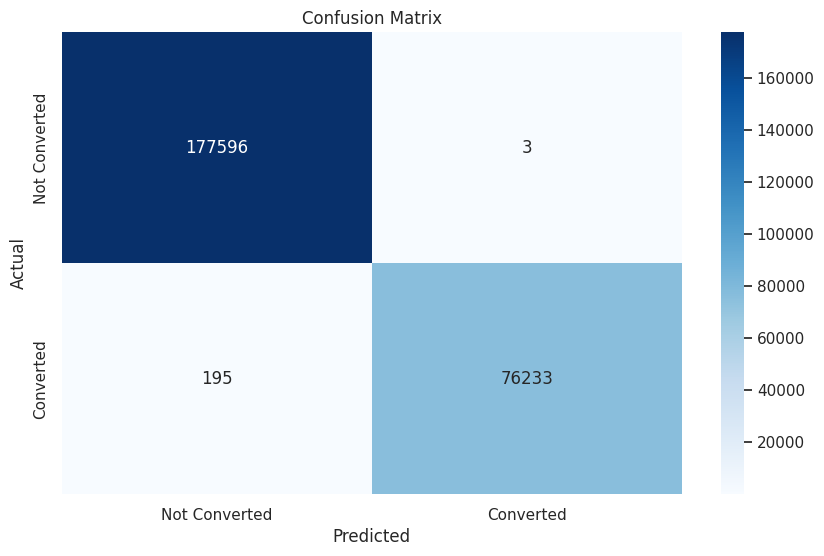

In [19]:
cm = confusion_matrix(y_test, y_pred)

#a heatmap for the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Converted', 'Converted'], 
            yticklabels=['Not Converted', 'Converted'])

# Set the labels and title
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [20]:
# Calculate and print the F1 score and AUC-ROC
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"\nF1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {auc_roc:.4f}")

# Feature importance
feature_importance = model.named_steps['classifier'].feature_importances_
feature_names = (numeric_features + 
                 model.named_steps['preprocessor']
                     .named_transformers_['cat']
                     .named_steps['onehot']
                     .get_feature_names_out(categorical_features).tolist())


F1 Score: 0.9987
AUC-ROC Score: 0.9997


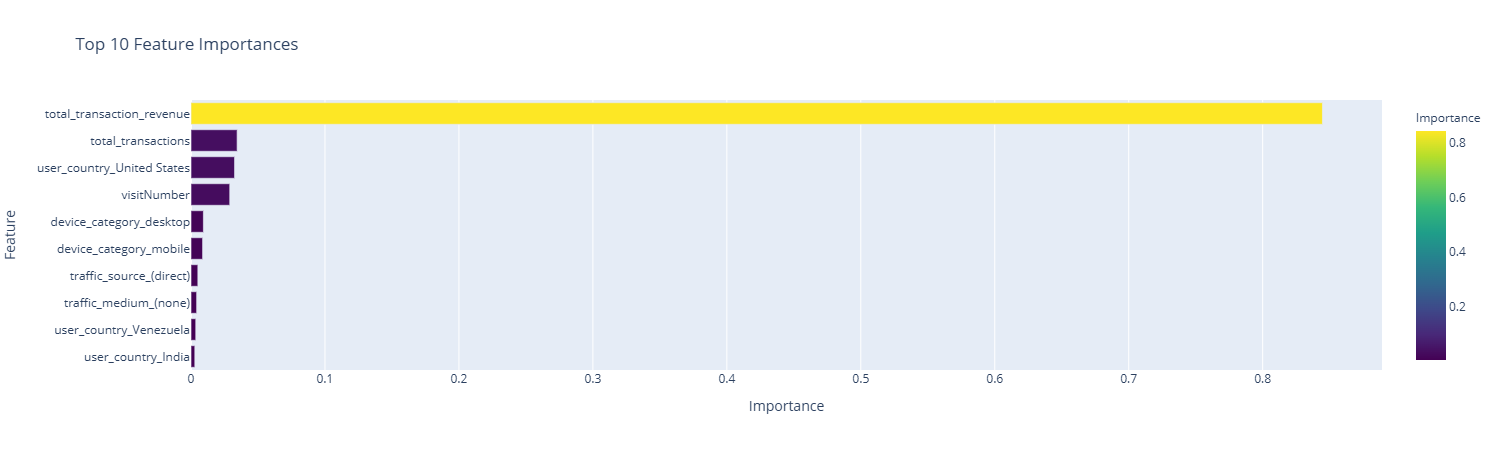

In [21]:
# Create a dataframe of feature importances
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(10)

# Plot feature importances using Plotly
fig = px.bar(feature_importance_df, x='importance', y='feature', orientation='h',
             title='Top 10 Feature Importances',
             labels={'importance': 'Importance', 'feature': 'Feature'},
             color='importance',
             color_continuous_scale='viridis')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

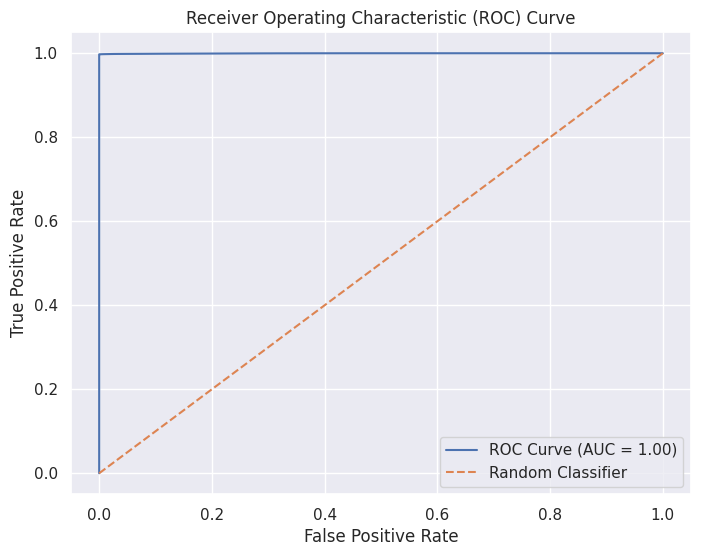

In [22]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

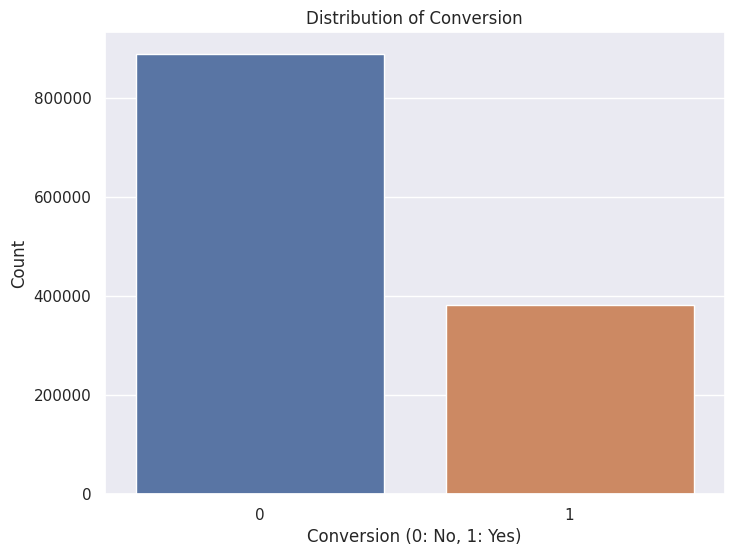

In [23]:
# Class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='conversion', data=df)
plt.title('Distribution of Conversion')
plt.xlabel('Conversion (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

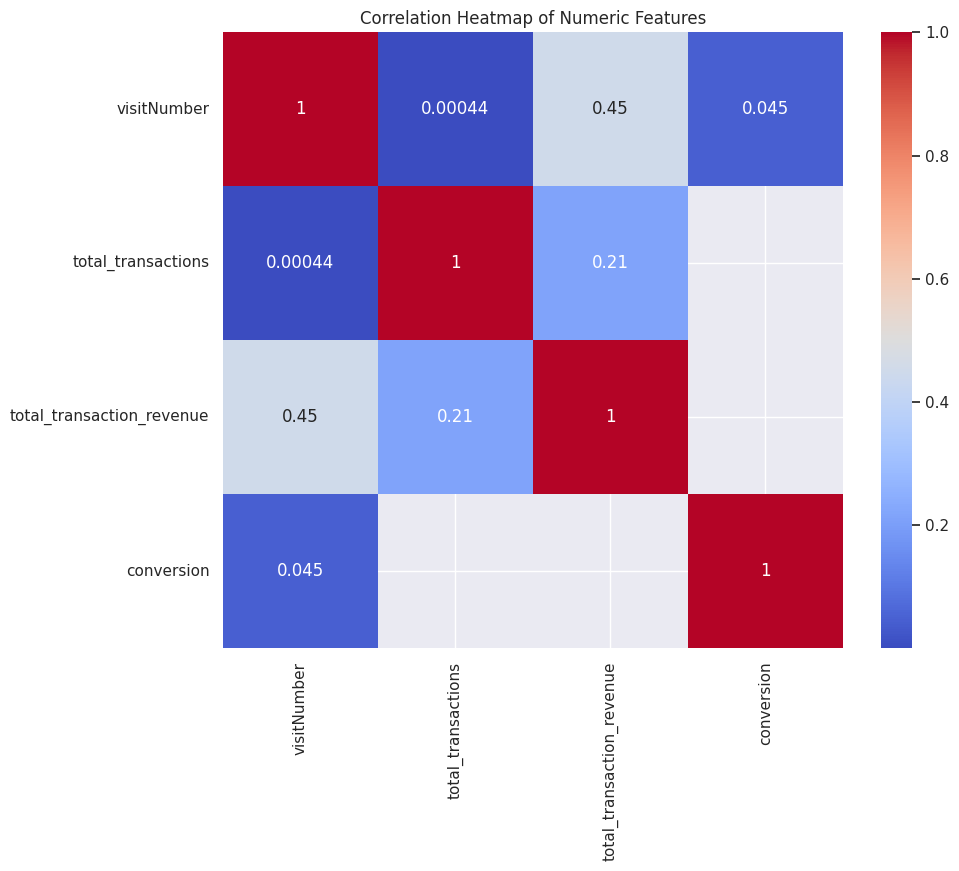

In [24]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_features + ['conversion']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()